<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Визуализация-Shimmer'a-и-вариабельности" data-toc-modified-id="Визуализация-Shimmer'a-и-вариабельности-1">Визуализация Shimmer'a и вариабельности</a></span><ul class="toc-item"><li><span><a href="#Считывание-данных-Shimmer-из-.csv" data-toc-modified-id="Считывание-данных-Shimmer-из-.csv-1.1">Считывание данных Shimmer из .csv</a></span></li><li><span><a href="#Вариабельность" data-toc-modified-id="Вариабельность-1.2">Вариабельность</a></span><ul class="toc-item"><li><span><a href="#Статистики-по-вариабельности" data-toc-modified-id="Статистики-по-вариабельности-1.2.1">Статистики по вариабельности</a></span></li><li><span><a href="#Диаграмма-Пуанкаре" data-toc-modified-id="Диаграмма-Пуанкаре-1.2.2">Диаграмма Пуанкаре</a></span></li><li><span><a href="#Спектральный-анализ-вариабельности" data-toc-modified-id="Спектральный-анализ-вариабельности-1.2.3">Спектральный анализ вариабельности</a></span></li></ul></li></ul></li></ul></div>

# Визуализация Shimmer'a и вариабельности

In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import shimmer_reading as shr
import variability_features as vf

## Считывание данных Shimmer из .csv

In [96]:
def plot_shimmer_peaks(shimmer, raw_shimmer, figsize):
    plt.figure(figsize=figsize)
    max_plot_length = 10000  # чем меньше, тем меньше точек на графике
    t_raw, sh_raw, fps_sh = raw_shimmer
    peaktime, peak_shim_values, hr_sh = shimmer
    plt.plot(t_raw[:max_plot_length], sh_raw[:max_plot_length])
    plt.plot(peaktime[:max_plot_length // 200], peak_shim_values[:max_plot_length // 200], 'o')
    plt.title('Shimmer peaks', fontsize=16)
    plt.xlabel('timestamp', fontsize=14)
    plt.ylabel('Shimmer value', fontsize=14)

In [97]:
shimmer_csv_path = 'C:/Users/User/Desktop/HSE/Marina/DefaultRecord/Scene_0/Shimmer_id8DC8_0.csv'

In [98]:
shimmer_raw, shimmer_parsed = shr.get_shimmer_from_csv(
    shimmer_csv_path,
    column=3
    # для id8DC8: column=3
    # для экг: column=4, EXG1 CH1 > CAL > mVolts
)

plot_shimmer_peaks(shimmer_parsed, shimmer_raw, (16, 4))

Text(0, 0.5, 'hr')

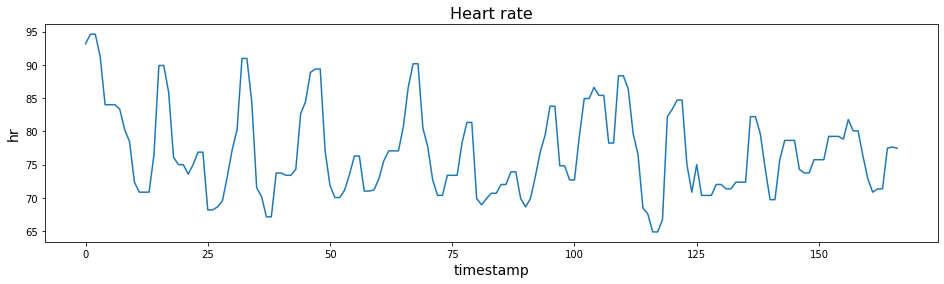

In [99]:
plt.figure(figsize=(16, 4))
plt.plot(shimmer_parsed[-1])
plt.title('Heart rate', fontsize=16)
plt.xlabel('timestamp', fontsize=14)
plt.ylabel('hr', fontsize=14)

## Вариабельность

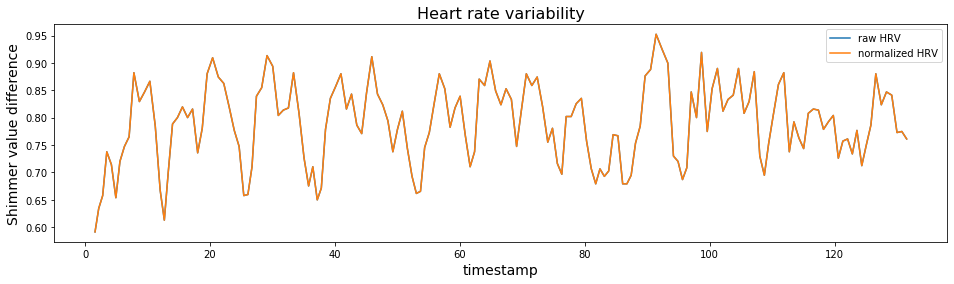

In [100]:
hrv = vf.get_hrv(shimmer_parsed)
peaktime, hr_sh = hrv

normalized_hrv = vf.normalize_hrv(hrv)
n_peaktime, n_hr_sh = normalized_hrv

plt.figure(figsize=(16, 4))
plt.plot(peaktime, hr_sh, label='raw HRV')
plt.plot(n_peaktime, n_hr_sh, label='normalized HRV')
plt.title('Heart rate variability', fontsize=16)
plt.xlabel('timestamp', fontsize=14)
plt.ylabel('Shimmer value difference', fontsize=14)
plt.legend()

### Статистики по вариабельности

In [101]:
peaktime, hr_sh = normalized_hrv
nhrv_statistics = vf.get_statistic(hr_sh, ['mean', 'sdnn', 'cv', 'pnn50', 'rmssd'])

print('{:<10} {:<10}'.format('statistic', 'value'))
for stat_name, stat_val in nhrv_statistics.items():
    print('{:<10} {:.5f}'.format(stat_name, stat_val))

statistic  value     
mean       0.78753
sdnn       0.07252
cv         0.09208
pnn50      0.21212
rmssd      0.05867


### Диаграмма Пуанкаре

In [102]:
x, y = vf.get_poincare_coordinates(normalized_hrv)

plt.plot(x, y, 'o')
plt.xlabel('RR(n)', fontsize=14)
plt.ylabel('RR(n + 1)', fontsize=14)
plt.title('Poincare diagram', fontsize=16)

Text(0.5, 1.0, 'Poincare diagram')

### Спектральный анализ вариабельности

In [103]:
from variability_features import (
    ulf_upper,
    vlf_upper,
    lf_upper,
    hf_upper
)

def plot_spectr_components(max_height):
    y_values = [0, max_height]
    plt.plot([ulf_upper] * 2, y_values, 'k--')
    plt.plot([vlf_upper] * 2, y_values, 'k--')
    plt.plot([lf_upper] * 2, y_values, 'k--')
    plt.plot([hf_upper] * 2, y_values, 'k--')

In [104]:
plt.figure(figsize=(16, 4))

frq, Y = vf.get_spectral_rr(*normalized_hrv)
freq_auc = vf.get_frequency_auc(frq, Y)
print('{:<10} {:<10}'.format('frequency', 'power spectrum'))
for freq_name, auc in freq_auc.items():
    print('{:<10} {:.5f}'.format(freq_name, auc))

plt.plot(frq, Y)
plot_spectr_components(Y.max())

plt.xlabel("Frequencies in Hz", fontsize=14)
plt.ylabel('RR change (seconds)', fontsize=14)
plt.title('Spectral RR', fontsize=16)

frequency  power spectrum
hf         0.15560
lf         0.12190
vlf        0.01636
ulf        0.00000


Text(0.5, 1.0, 'Spectral RR')